In [3]:
import pandas as pd

In [4]:
df=pd.read_excel('Data_Train.xlsx')

In [5]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [5]:
df.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

In [6]:
df.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [7]:
df.isnull().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                36
Power                 36
Seats                 42
New_Price            726
Price                  0
dtype: int64

In [8]:
df.loc[df['Owner_Type']=='NaN',]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price


In [9]:
df['Seats'].value_counts()

5.0     5014
7.0      674
8.0      134
4.0       99
6.0       31
2.0       16
10.0       5
9.0        3
0.0        1
Name: Seats, dtype: int64

In [10]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,4.34 Lakh,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,9.99 Lakh,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,7.45 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,9.56 Lakh,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,29.64 Lakh,17.74


In [11]:
df_new=df.copy()

In [12]:
df_new['Power'] = df_new['Power'].replace('bhp','', regex=True)
df_new['Engine'] = df_new['Engine'].replace('CC','',regex=True)
df_new['Mileage'] = df_new['Mileage'].replace('kmpl','', regex=True)
df_new['Mileage'] = df_new['Mileage'].replace('km/kg','', regex=True)
df_new['Power']=pd.to_numeric(df_new['Power'],downcast='integer',errors='coerce')
df_new['Engine']=pd.to_numeric(df_new['Engine'],downcast='integer',errors='coerce')
df_new['Mileage']=pd.to_numeric(df_new['Mileage'],downcast='integer',errors='coerce')

In [13]:
df_new.isnull().sum()  #mileage=70 0&null

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                36
Power                143
Seats                 42
New_Price            726
Price                  0
dtype: int64

In [14]:
df_new.Mileage.where(df_new.Mileage!=0,inplace=True)
df_new.isnull().sum() 

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage               70
Engine                36
Power                143
Seats                 42
New_Price            726
Price                  0
dtype: int64

In [15]:
df_new.where(df_new!=0,inplace=True)
df_new.isnull().sum() 

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage               70
Engine                36
Power                143
Seats                 43
New_Price            726
Price                  0
dtype: int64

In [16]:
df_new.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,6019.000000,6.019000e+03,5949.000000,5983.000000,5876.000000,5976.000000,6019.000000
mean,2013.358199,5.873838e+04,18.342252,1621.276450,113.253050,5.279618,9.479468
std,3.269742,9.126884e+04,4.175475,601.355233,53.874957,0.806019,11.187917
min,1998.000000,1.710000e+02,6.400000,72.000000,34.200000,2.000000,0.440000
25%,2011.000000,3.400000e+04,15.300000,1198.000000,75.000000,5.000000,3.500000
50%,2014.000000,5.300000e+04,18.200000,1493.000000,97.700000,5.000000,5.640000
75%,2016.000000,7.300000e+04,21.100000,1984.000000,138.100000,5.000000,9.950000
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160.000000


In [17]:
df_new.corr()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
Year,1.000000,-0.173048,0.296718,-0.052197,0.014525,0.011909,0.305327
Kilometers_Driven,-0.173048,1.000000,-0.064283,0.091068,0.033503,0.084209,-0.011493
Mileage,0.296718,-0.064283,1.000000,-0.646476,-0.553764,-0.348206,-0.333263
Engine,-0.052197,0.091068,-0.646476,1.000000,0.866185,0.397848,0.658354
Power,0.014525,0.033503,-0.553764,0.866185,1.000000,0.101562,0.772566
Seats,0.011909,0.084209,-0.348206,0.397848,0.101562,1.000000,0.053247
Price,0.305327,-0.011493,-0.333263,0.658354,0.772566,0.053247,1.000000


In [18]:
df_new['Brand']=df_new['Name'].apply(lambda x:' '.join(x.split()[:1]))
df_new['Model']=df_new['Name'].apply(lambda x:' '.join(x.split()[1:2]))
df_new['Variant']=df_new['Name'].apply(lambda x:' '.join(x.split()[2:]))
df_new['Name']=df_new['Name'].apply(lambda x:' '.join(x.lower() for x in x.split()))
df_new['Brand']=df_new['Bran vsd'].apply(lambda x:' '.join(x.lower() for x in x.split()))
df_new['Model']=df_new['Model'].apply(lambda x:' '.join(x.lower() for x in x.split()))
df_new['Variant']=df_new['Variant'].apply(lambda x:' '.join(x.lower() for x in x.split()))
df_new.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model,Variant
0,maruti wagon r lxi cng,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,4.34 Lakh,1.75,maruti,wagon,r lxi cng
1,hyundai creta 1.6 crdi sx option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,9.99 Lakh,12.50,hyundai,creta,1.6 crdi sx option
2,honda jazz v,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,7.45 Lakh,4.50,honda,jazz,v
3,maruti ertiga vdi,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,9.56 Lakh,6.00,maruti,ertiga,vdi
4,audi a4 new 2.0 tdi multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,29.64 Lakh,17.74,audi,a4,new 2.0 tdi multitronic


In [19]:
df_new.groupby(by='Brand')['Mileage'].mean()

Brand
ambassador       12.800000
audi             15.236340
bentley           8.600000
bmw              16.989700
chevrolet        18.401157
datsun           21.590769
fiat             18.018519
force            17.000000
ford             18.529933
honda            18.488430
hyundai          19.286623
isuzu            12.866667
jaguar           14.955750
jeep             16.760000
lamborghini       6.400000
land             12.893137
mahindra         15.163048
maruti           21.523455
mercedes-benz    14.436536
mini             18.593846
mitsubishi       12.111111
nissan           19.361758
porsche          13.515556
renault          20.704759
skoda            16.977719
smart                  NaN
tata             19.839731
toyota           14.450882
volkswagen       18.317038
volvo            15.493333
Name: Mileage, dtype: float64

In [20]:
brand_list=df_new.Brand.unique().tolist()

In [21]:
for i in brand_list:
    df_new.Mileage[(df_new.Mileage.isnull()) & (df_new['Brand']==i)]= df_new.Mileage[(df_new.Mileage.notnull()) & (df_new['Brand']==i)].mean()
df_new.isnull().sum()

E:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                1
Engine                36
Power                143
Seats                 43
New_Price            726
Price                  0
Brand                  0
Model                  0
Variant                0
dtype: int64

In [22]:
df_new.Mileage[df_new.Mileage.isnull()]=df_new.Mileage[df_new.Mileage.notnull()].mean()
df_new.isnull().sum()

E:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                0
Engine                36
Power                143
Seats                 43
New_Price            726
Price                  0
Brand                  0
Model                  0
Variant                0
dtype: int64

In [23]:
df_new.Mileage=df_new.Mileage.round(2)

In [24]:
for i in brand_list:
    df_new.Engine[(df_new.Engine.isnull()) & (df_new['Brand']==i)]= df_new.Engine[(df_new.Engine.notnull()) & (df_new['Brand']==i)].mean()
    df_new.Power[(df_new.Power.isnull()) & (df_new['Brand']==i)]= df_new.Power[(df_new.Power.notnull()) & (df_new['Brand']==i)].mean()
df_new.Seats[df_new.Seats.isnull()]=int(df_new.Seats[df_new.Seats.notnull()].mean())
df_new.isnull().sum()

E:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
E:\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
E:\anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                0
Engine                 0
Power                  1
Seats                  0
New_Price            726
Price                  0
Brand                  0
Model                  0
Variant                0
dtype: int64

In [25]:
df_new.Power[df_new.Power.isnull()]=round(df_new.Power[df_new.Power.notnull()].mean(),2)
df_new.isnull().sum()

E:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                0
Engine                 0
Power                  0
Seats                  0
New_Price            726
Price                  0
Brand                  0
Model                  0
Variant                0
dtype: int64

In [26]:
df_new.Engine.round(2)
df_new.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model,Variant
0,maruti wagon r lxi cng,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,4.34 Lakh,1.75,maruti,wagon,r lxi cng
1,hyundai creta 1.6 crdi sx option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,9.99 Lakh,12.50,hyundai,creta,1.6 crdi sx option
2,honda jazz v,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,7.45 Lakh,4.50,honda,jazz,v
3,maruti ertiga vdi,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,9.56 Lakh,6.00,maruti,ertiga,vdi
4,audi a4 new 2.0 tdi multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,29.64 Lakh,17.74,audi,a4,new 2.0 tdi multitronic


In [27]:
df_new['New_Price1']= df_new['New_Price'].apply(lambda x: float(str(x).replace(' Lakh','')) if (str(x).find('Lakh'))!=-1 else (float(str(x).replace(' Cr',''))*100 if (str(x).find('Cr'))!=-1 else 'Nan')) 

In [30]:
import numpy as np
import matplotlib.pyplot as plt
df_new.New_Price1[df_new.New_Price1=='Nan']=np.nan

E:\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
df_new['New_Price1']=pd.to_numeric(df_new['New_Price1'])
df_new.isnull().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                0
Engine                 0
Power                  0
Seats                  0
New_Price            726
Price                  0
Brand                  0
Model                  0
Variant                0
New_Price1           726
dtype: int64

In [32]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 17 columns):
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6019 non-null float64
Engine               6019 non-null float64
Power                6019 non-null float64
Seats                6019 non-null float64
New_Price            5293 non-null object
Price                6019 non-null float64
Brand                6019 non-null object
Model                6019 non-null object
Variant              6019 non-null object
New_Price1           5293 non-null float64
dtypes: float64(6), int64(2), object(9)
memory usage: 799.5+ KB


In [33]:
df_new2=df_new.copy()

In [34]:
# df_new.drop('New_Price',axis=1)
# df_new.info()

In [35]:
model_list=df_new.Model.unique().tolist()

In [36]:
model_brand=[]
for i in range(0,df_new.shape[0]):
    if (df_new.loc[i,'Model'],df_new.loc[i,'Brand']) not in model_brand:
        model_brand.append((df_new.loc[i,'Model'],df_new.loc[i,'Brand']))

In [37]:
len(model_brand)

215

In [38]:
for i in model_brand:
    df_new2.New_Price1[(df_new2.New_Price1.isnull()) & (df_new2['Model']==i[0]) & (df_new2['Brand']==i[1])]= df_new2.New_Price1[(df_new2.New_Price1.notnull()) & (df_new2['Model']==i[0])& (df_new2['Brand']==i[1])].mean()
df_new2.isnull().sum()

E:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                0
Engine                 0
Power                  0
Seats                  0
New_Price            726
Price                  0
Brand                  0
Model                  0
Variant                0
New_Price1            67
dtype: int64

In [39]:
for i in brand_list:
    df_new2.New_Price1[(df_new2.New_Price1.isnull()) & (df_new2['Brand']==i)] = df_new2.New_Price1[(df_new2.New_Price1.notnull()) & (df_new2['Brand']==i)].mean()
df_new2.isnull().sum()

E:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                0
Engine                 0
Power                  0
Seats                  0
New_Price            726
Price                  0
Brand                  0
Model                  0
Variant                0
New_Price1             3
dtype: int64

In [40]:
drop_p=df_new2[df_new2.Price>df_new2.New_Price1].index

In [41]:
df_new2.drop(drop_p,axis=0,inplace=True)

In [42]:
df_new2[df_new2.New_Price1.isnull()==True].index

Int64Index([915, 1221, 5521], dtype='int64')

In [43]:
df_new2.drop([915, 1221, 5521],axis=0,inplace=True)
df_new2.isnull().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                0
Engine                 0
Power                  0
Seats                  0
New_Price            624
Price                  0
Brand                  0
Model                  0
Variant                0
New_Price1             0
dtype: int64

In [44]:
# df_new2.drop('New_Price',axis=1,inplace=True)
df_new2.New_Price1=df_new2.New_Price1.round(2)
df_new2.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model,Variant,New_Price1
0,maruti wagon r lxi cng,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,4.34 Lakh,1.75,maruti,wagon,r lxi cng,4.34
2,honda jazz v,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,7.45 Lakh,4.50,honda,jazz,v,7.45
3,maruti ertiga vdi,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,9.56 Lakh,6.00,maruti,ertiga,vdi,9.56
4,audi a4 new 2.0 tdi multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,29.64 Lakh,17.74,audi,a4,new 2.0 tdi multitronic,29.64
5,hyundai eon lpg era plus option,Hyderabad,2012,75000,LPG,Manual,First,21.10,814.0,55.20,5.0,NaN,2.35,hyundai,eon,lpg era plus option,7.02


In [45]:
df_new2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5262 entries, 0 to 6018
Data columns (total 17 columns):
Name                 5262 non-null object
Location             5262 non-null object
Year                 5262 non-null int64
Kilometers_Driven    5262 non-null int64
Fuel_Type            5262 non-null object
Transmission         5262 non-null object
Owner_Type           5262 non-null object
Mileage              5262 non-null float64
Engine               5262 non-null float64
Power                5262 non-null float64
Seats                5262 non-null float64
New_Price            4638 non-null object
Price                5262 non-null float64
Brand                5262 non-null object
Model                5262 non-null object
Variant              5262 non-null object
New_Price1           5262 non-null float64
dtypes: float64(6), int64(2), object(9)
memory usage: 740.0+ KB


In [46]:
import os
os.getcwd()

'C:\\Users\\Ankit\\Desktop\\Praxis\\ML\\EDA\\Model'

In [47]:
import seaborn as sns

In [48]:
import UnivariateAnalysis1 as Graph

In [49]:
df_new2['Ratio']=df_new2.Price/df_new2.New_Price1
# df_new2.boxplot(column='Ratio',by='Seats',fontsize=10,figsize=(10,6),return_type='both')
# plt.ylabel('Price')
# plt.savefig('Boxplot on Price grouped by Seats')

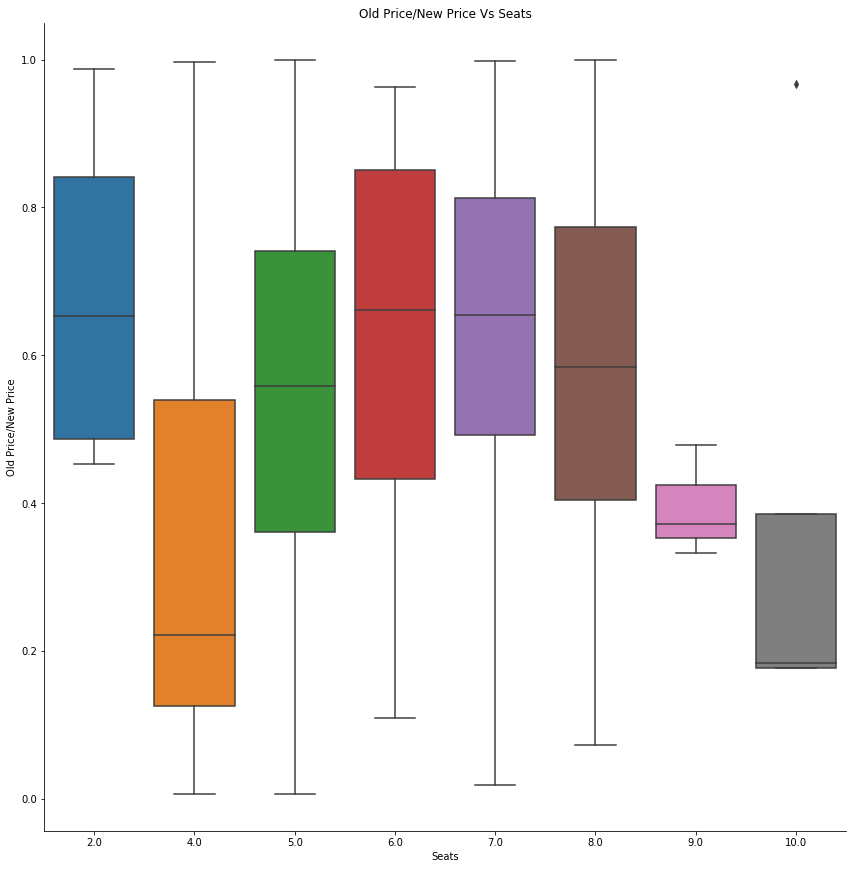

In [50]:
mx = sns.factorplot(y="Ratio", x="Seats", data=df_new2,kind="box",size=12 ,aspect=1)
mx.set(ylabel='Old Price/New Price')
mx.set(xlabel= 'Seats')
plt.title('Old Price/New Price Vs Seats');
plt.savefig('Ratio Vs Seats')

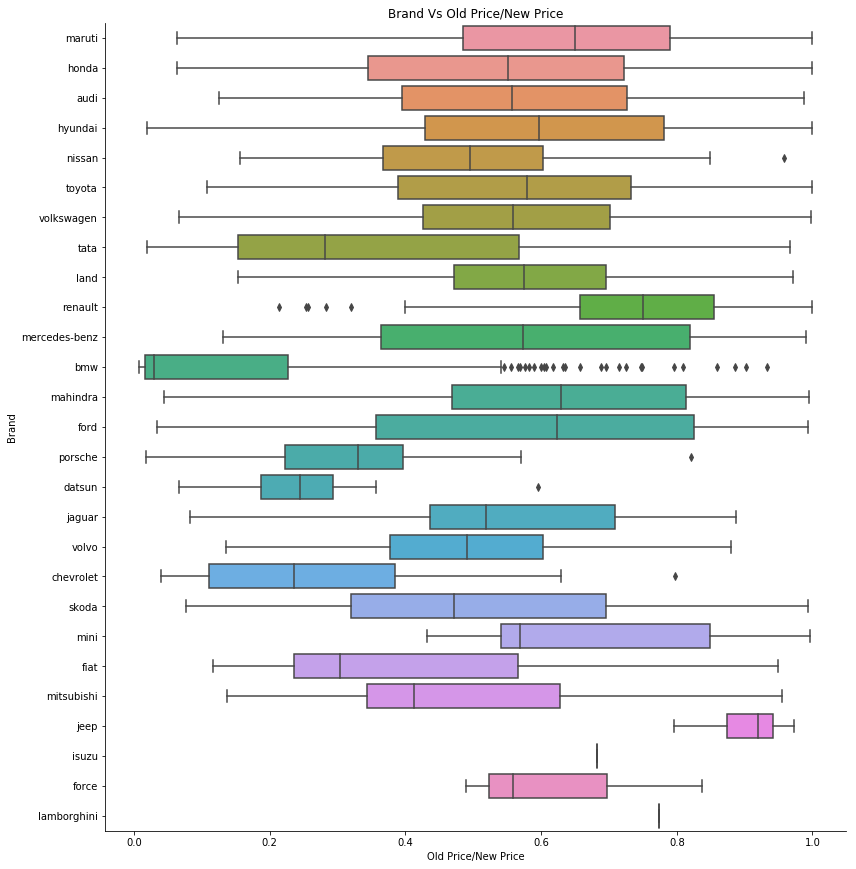

In [51]:
mx = sns.factorplot(x="Ratio", y="Brand", data=df_new2,kind="box",size=12 ,aspect=1)
mx.set(xlabel='Old Price/New Price')
mx.set(ylabel= 'Brand')
plt.title('Brand Vs Old Price/New Price');
plt.savefig('Ratio Vs Brand')

In [52]:
df_new2.Year=pd.Categorical(df_new2.Year)
df_new2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5262 entries, 0 to 6018
Data columns (total 18 columns):
Name                 5262 non-null object
Location             5262 non-null object
Year                 5262 non-null category
Kilometers_Driven    5262 non-null int64
Fuel_Type            5262 non-null object
Transmission         5262 non-null object
Owner_Type           5262 non-null object
Mileage              5262 non-null float64
Engine               5262 non-null float64
Power                5262 non-null float64
Seats                5262 non-null float64
New_Price            4638 non-null object
Price                5262 non-null float64
Brand                5262 non-null object
Model                5262 non-null object
Variant              5262 non-null object
New_Price1           5262 non-null float64
Ratio                5262 non-null float64
dtypes: category(1), float64(7), int64(1), object(9)
memory usage: 905.9+ KB


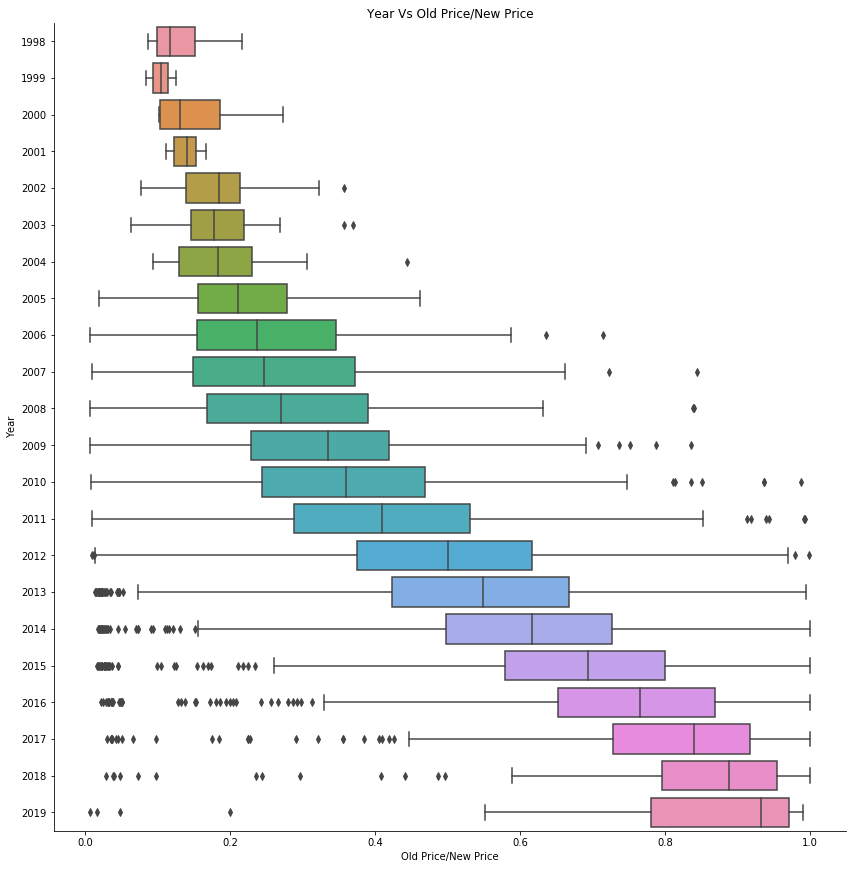

In [53]:
mx = sns.factorplot(x="Ratio", y="Year", data=df_new2,kind="box",size=12 ,aspect=1)
mx.set(xlabel='Old Price/New Price')
mx.set(ylabel= 'Year')
plt.title('Year Vs Old Price/New Price');
plt.savefig('Ratio Vs Year')

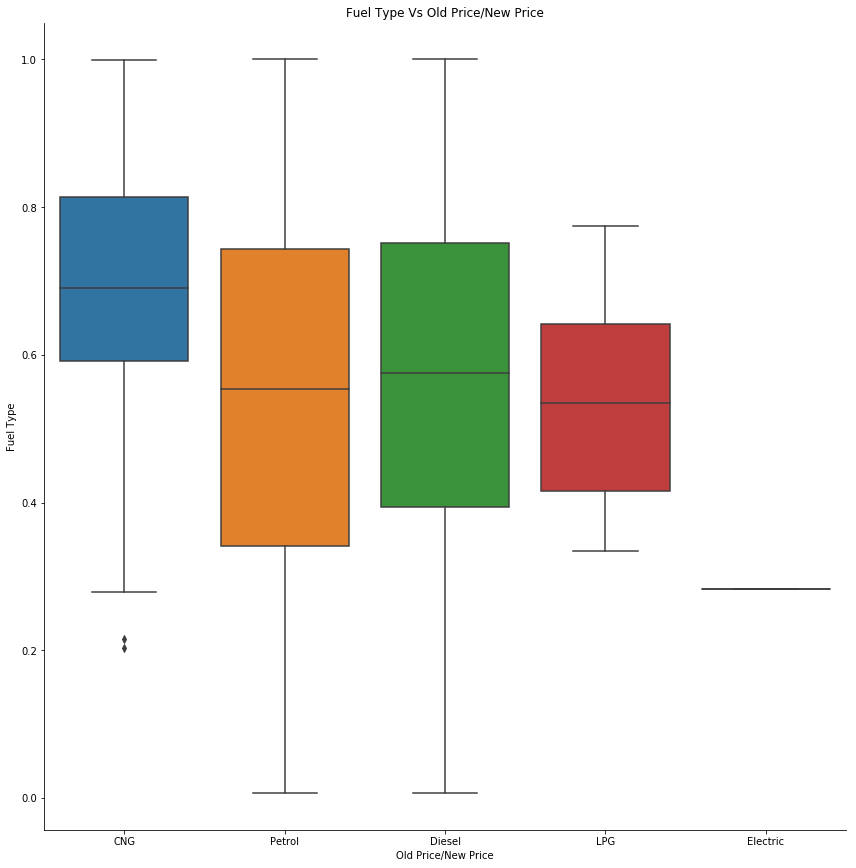

In [54]:
mx = sns.factorplot(y="Ratio", x="Fuel_Type", data=df_new2,kind="box",size=12 ,aspect=1)
mx.set(xlabel='Old Price/New Price')
mx.set(ylabel= 'Fuel Type')
plt.title('Fuel Type Vs Old Price/New Price');
plt.savefig('Ratio Vs Fuel Type')

In [55]:
df_new2.Year=pd.to_numeric(df_new2.Year)

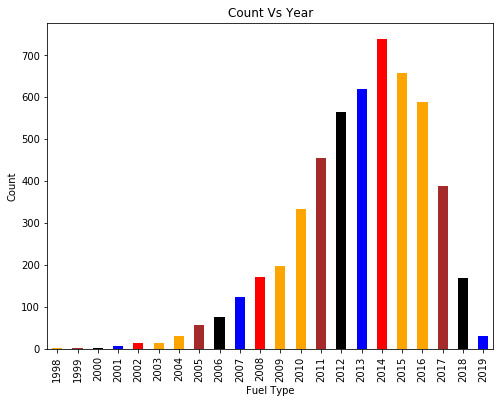

In [56]:
plt.figure(figsize=(8,6))
df_new2['Year'].value_counts().sort_index().plot(x='Year',kind='bar',color=['Orange','Brown','Black','Blue','Red'])
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.title('Count Vs Year')
plt.savefig('Count Vs Year')
plt.show()

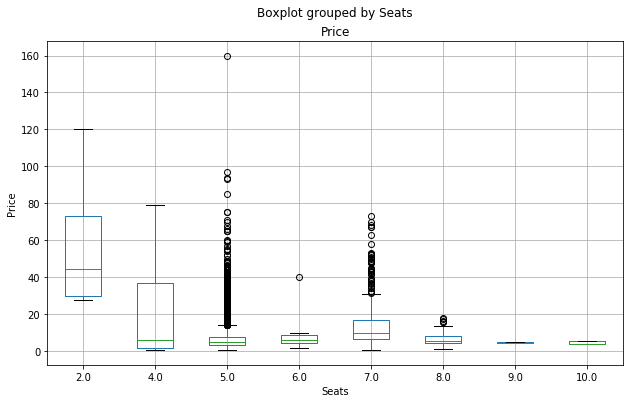

In [57]:
k=df_new2.boxplot(column='Price',by='Seats',fontsize=10,figsize=(10,6),return_type='both')
plt.ylabel('Price')
plt.savefig('Boxplot on Price grouped by Seats')

In [58]:
def seats(i):
    k=df_new2.Price[(df_new2.Seats==i)].describe().tolist()
    iqr=k[6]-k[4]
    up=k[6]+1.5*iqr
    lb=k[4]-1.5*iqr
    l=(df_new2.Price[(df_new2.Seats==i)] > up ) | (df_new2.Price[(df_new2.Seats==i)] < lb )
    return l.sum()

In [59]:
# k=df_new2.Price[(df_new2.Seats==5)].describe().tolist()
# iqr=k[6]-k[4]
# up=k[6]+1.5*iqr
# lb=k[4]-1.5*iqr
# l=(df_new2.Price[(df_new2.Seats==5)] > up ) | (df_new2.Price[(df_new2.Seats==5)] < lb )

In [60]:
un_s=df_new2.Seats.unique()
outlier=[seats(int(j)) for j in un_s]
out_df=pd.DataFrame()
out_df['Seats']=np.array(un_s)
out_df['Outliers']=np.array(outlier)
out_df

,Seats,Outliers
0,5.0,618
1,7.0,41
2,8.0,5
3,4.0,0
4,6.0,1
5,2.0,0
6,10.0,0
7,9.0,0


In [61]:
desc_seats=df_new2.groupby(by='Seats',as_index=True)['Price'].describe()
desc_seats=pd.DataFrame(desc_seats,index=None)
desc_seats['Seats']=np.array([2,4,5,6,7,8,9,10])
seats_merge=out_df.merge(desc_seats,on='Seats')
# desc_seats.columns

In [62]:
seats_merge.drop(['mean','std'],axis=1).round(2).sort_values(by='Outliers',ascending=False)

,Seats,Outliers,count,min,25%,50%,75%,max
0,5,618,4473.0,0.45,3.10,4.69,7.50,160.00
1,7,41,551.0,0.60,6.69,9.45,16.50,72.94
2,8,5,113.0,0.85,4.25,5.50,8.25,17.92
4,6,1,16.0,1.70,4.01,5.85,8.85,40.00
3,4,0,93.0,0.44,1.60,5.75,37.00,79.00
5,2,0,8.0,27.35,29.50,44.27,73.00,120.00
6,10,0,5.0,3.50,3.50,3.65,5.25,5.50
7,9,0,3.0,4.10,4.30,4.50,4.62,4.75


In [63]:
seats_merge['OutliersbyCount']=np.array(seats_merge['count']/seats_merge.Outliers)
seats_merge.OutliersbyCount=seats_merge.OutliersbyCount.where(seats_merge.OutliersbyCount!=np.inf,0).round(2)
seats_merge.sort_values(by='OutliersbyCount',ascending=False)

,Seats,Outliers,count,mean,std,min,25%,50%,75%,max,OutliersbyCount
2,8,5,113.0,6.600442,3.694674,0.85,4.2500,5.50,8.250,17.92,22.60
4,6,1,16.0,8.151250,8.840708,1.70,4.0125,5.85,8.850,40.00,16.00
1,7,41,551.0,13.561071,11.629725,0.60,6.6900,9.45,16.500,72.94,13.44
0,5,618,4473.0,7.771154,9.271074,0.45,3.1000,4.69,7.500,160.00,7.24
3,4,0,93.0,20.137634,22.220470,0.44,1.6000,5.75,37.000,79.00,0.00
5,2,0,8.0,57.361250,35.834840,27.35,29.5000,44.27,73.000,120.00,0.00
6,10,0,5.0,4.280000,1.005361,3.50,3.5000,3.65,5.250,5.50,0.00
7,9,0,3.0,4.450000,0.327872,4.10,4.3000,4.50,4.625,4.75,0.00


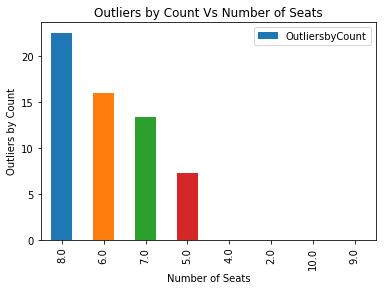

In [64]:
seats_merge.sort_values(by='OutliersbyCount',ascending=False).plot(x='Seats',y='OutliersbyCount',kind='bar')
plt.xlabel('Number of Seats')
plt.ylabel('Outliers by Count')
plt.title('Outliers by Count Vs Number of Seats')
plt.savefig('Outliers by Count Vs Number of Seats')
plt.show()

In [65]:
seats_merge.round(2).to_excel('Seats_desc.xlsx')

In [66]:
un_s

array([ 5.,  7.,  8.,  4.,  6.,  2., 10.,  9.])

In [67]:
k[6]-k[4]

IndexError: index out of bounds

In [68]:
df_new2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5262 entries, 0 to 6018
Data columns (total 18 columns):
Name                 5262 non-null object
Location             5262 non-null object
Year                 5262 non-null int64
Kilometers_Driven    5262 non-null int64
Fuel_Type            5262 non-null object
Transmission         5262 non-null object
Owner_Type           5262 non-null object
Mileage              5262 non-null float64
Engine               5262 non-null float64
Power                5262 non-null float64
Seats                5262 non-null float64
New_Price            4638 non-null object
Price                5262 non-null float64
Brand                5262 non-null object
Model                5262 non-null object
Variant              5262 non-null object
New_Price1           5262 non-null float64
Ratio                5262 non-null float64
dtypes: float64(7), int64(2), object(9)
memory usage: 941.1+ KB


In [69]:
df_new2.Kilometers_Driven[df_new2.Kilometers_Driven==6500000]=650000

E:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


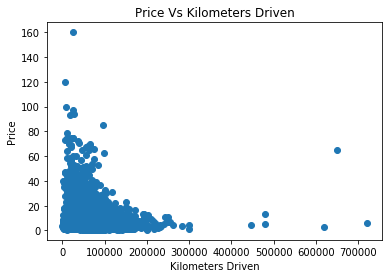

In [70]:
plt.scatter(df_new2.Kilometers_Driven,df_new2.Price)
plt.xlabel('Kilometers Driven')
plt.ylabel('Price')
plt.title('Price Vs Kilometers Driven')
plt.savefig('Km vs Price.jpg')

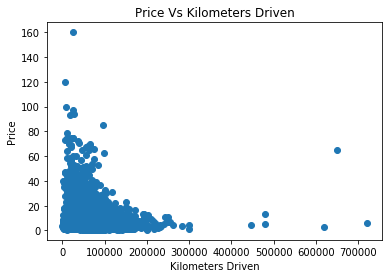

In [71]:
plt.scatter(df_new2.Kilometers_Driven,df_new2.Price)
plt.xlabel('Kilometers Driven')
plt.ylabel('Price')
plt.title('Price Vs Kilometers Driven')
plt.savefig('Km vs Price.jpg')

In [290]:
plt.savefig('Km vs Price.jpg')

In [291]:
os.getcwd()

'C:\\Users\\Ankit\\Desktop\\Praxis\\ML\\EDA\\Model'

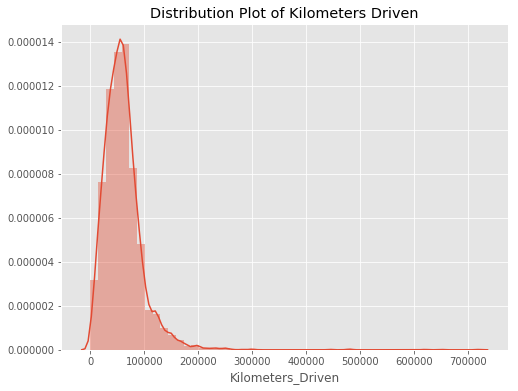

In [341]:
sns.distplot(df_new2.Kilometers_Driven)
plt.title('Distribution Plot of Kilometers Driven')
plt.savefig('Dist Plot of Kilometers Driven')

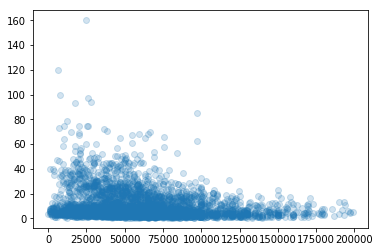

In [100]:
plt.scatter(df_new2.Kilometers_Driven[df_new2.Kilometers_Driven<200000],df_new2.Price[df_new2.Kilometers_Driven<200000],alpha=0.2)
plt.show()

In [342]:
df_new2.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price', 'Brand', 'Model', 'Variant', 'New_Price1'],
      dtype='object')

In [539]:
def Location(i):
    k=df_new2.Price[(df_new2.Location==i)].describe().tolist()
    iqr=k[6]-k[4]
    up=k[6]+1.5*iqr
    lb=k[4]-1.5*iqr
    l=(df_new2.Price[(df_new2.Location==i)] > up ) | (df_new2.Price[(df_new2.Location==i)] < lb )
    return l.sum()

In [540]:
un_s=df_new2.Location.unique()
outlier=[Location(j) for j in un_s]
out_df1=pd.DataFrame()
out_df1['Location']=np.array(un_s)
out_df1['Count_of_Outliers']=np.array(outlier)

In [541]:
out_df1

,Location,Count_of_Outliers
0,Mumbai,79
1,Chennai,57
2,Coimbatore,26
3,Hyderabad,94
4,Jaipur,37
5,Pune,67
6,Kolkata,48
7,Delhi,53
8,Kochi,74
9,Bangalore,16


In [542]:
desc_loc=df_new2.groupby(by='Location',as_index=True)['Price'].describe()
desc_loc=pd.DataFrame(desc_loc,index=None)

In [543]:
desc_loc['Location']=np.array(desc_loc.index)

In [545]:
loc_merge1=out_df1.merge(desc_loc,on='Location')
loc_merge1.sort_values(by='Count_of_Outliers',ascending=False)

,Location,Count_of_Outliers,count,mean,std,min,25%,50%,75%,max
3,Hyderabad,94,648.0,8.978225,11.713304,0.60,3.2875,5.300,8.8100,160.00
0,Mumbai,79,710.0,8.631310,8.880908,0.55,3.5125,5.500,9.4875,75.00
8,Kochi,74,501.0,10.732655,11.840126,1.26,4.3800,6.280,10.6400,97.07
5,Pune,67,578.0,6.238374,7.006109,0.44,2.6025,3.925,6.5000,68.00
1,Chennai,57,460.0,7.125196,8.906857,0.65,2.7500,4.375,7.0000,70.00
7,Delhi,53,506.0,9.193676,11.014023,0.75,3.5000,5.205,10.6875,120.00
6,Kolkata,48,515.0,5.315107,6.233639,0.65,2.5300,3.550,5.5000,75.00
4,Jaipur,37,382.0,5.380419,5.497532,0.45,2.3625,4.000,5.8500,42.50
2,Coimbatore,26,448.0,14.198058,13.914416,1.68,5.2075,7.510,20.1750,93.67
10,Ahmedabad,17,203.0,8.303645,8.723869,0.75,3.6600,5.700,9.9500,85.00


In [568]:
# out=loc_merge1.Count_of_Outliers.values.tolist()
loc_merge1['count'].values

array([710., 460., 448., 648., 382., 578., 515., 506., 501., 311., 203.])

In [572]:
loc_merge1['OutliersbyCount']=np.array(loc_merge1['count']/loc_merge1.Count_of_Outliers)

In [574]:
loc_merge1.sort_values(by='OutliersbyCount',ascending=False)

,Location,Count_of_Outliers,count,mean,std,min,25%,50%,75%,max,OutliersbyCount
9,Bangalore,16,311.0,12.146977,13.449658,1.35,4.1250,6.200,17.7500,93.00,19.437500
2,Coimbatore,26,448.0,14.198058,13.914416,1.68,5.2075,7.510,20.1750,93.67,17.230769
10,Ahmedabad,17,203.0,8.303645,8.723869,0.75,3.6600,5.700,9.9500,85.00,11.941176
6,Kolkata,48,515.0,5.315107,6.233639,0.65,2.5300,3.550,5.5000,75.00,10.729167
4,Jaipur,37,382.0,5.380419,5.497532,0.45,2.3625,4.000,5.8500,42.50,10.324324
7,Delhi,53,506.0,9.193676,11.014023,0.75,3.5000,5.205,10.6875,120.00,9.547170
0,Mumbai,79,710.0,8.631310,8.880908,0.55,3.5125,5.500,9.4875,75.00,8.987342
5,Pune,67,578.0,6.238374,7.006109,0.44,2.6025,3.925,6.5000,68.00,8.626866
1,Chennai,57,460.0,7.125196,8.906857,0.65,2.7500,4.375,7.0000,70.00,8.070175
3,Hyderabad,94,648.0,8.978225,11.713304,0.60,3.2875,5.300,8.8100,160.00,6.893617


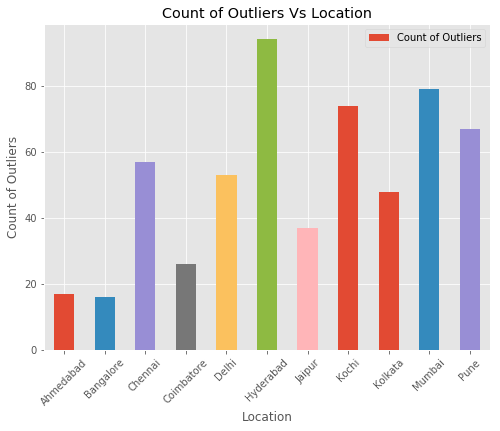

In [433]:
out_df1.sort_values(by='Location').plot(x='Location',y='Count of Outliers',kind='bar',rot=45)
plt.xlabel('Location')
plt.ylabel('Count of Outliers')
plt.title('Count of Outliers Vs Location')
plt.savefig('Count of Outliers Vs Location')
plt.show()

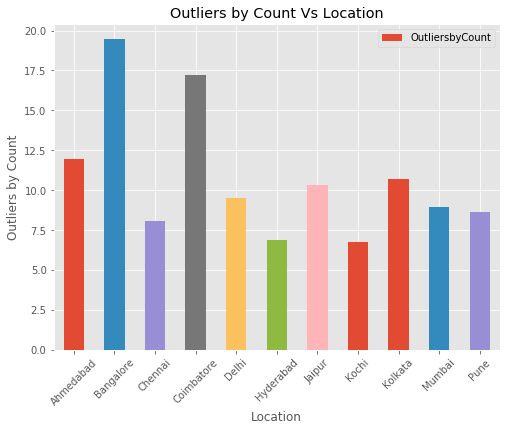

In [586]:
loc_merge1.sort_values(by='Location').plot(x='Location',y='OutliersbyCount',kind='bar',rot=45)
plt.xlabel('Location')
plt.ylabel('Outliers by Count')
plt.title('Outliers by Count Vs Location')
plt.savefig('Outliers by Count Vs Location')
plt.show()

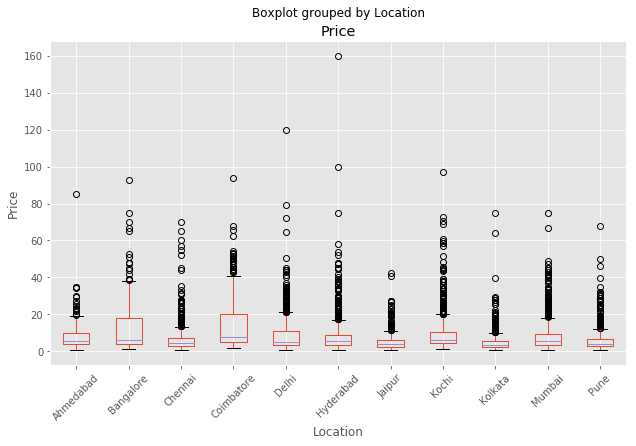

In [355]:
df_new2.boxplot(column='Price',by='Location',fontsize=10,figsize=(10,6),rot=45)
plt.ylabel('Price')
plt.savefig('Boxplot on Location grouped by Location')

In [394]:
df_new2.groupby(by='Year')['Price'].mean().index

Int64Index([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
            2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
           dtype='int64', name='Year')

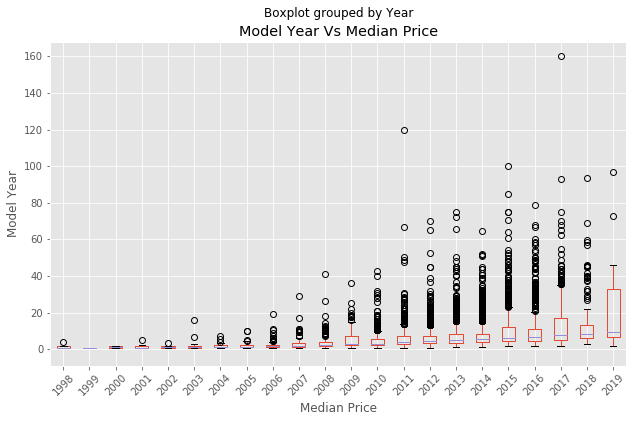

In [400]:
df_new2.boxplot(column='Price',by='Year',fontsize=10,figsize=(10,6),rot=45)
plt.ylabel('Price')
plt.savefig('Boxplot on Price grouped by Year')


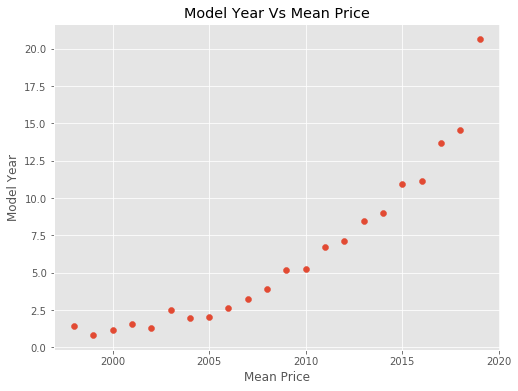

In [401]:
plt.scatter(x=df_new2.groupby(by='Year')['Price'].mean().index,y=df_new2.groupby(by='Year')['Price'].mean().values)
plt.title('Model Year Vs Mean Price')
plt.xlabel('Mean Price')
plt.ylabel('Model Year')
plt.savefig('Model Year Vs Mean Price')

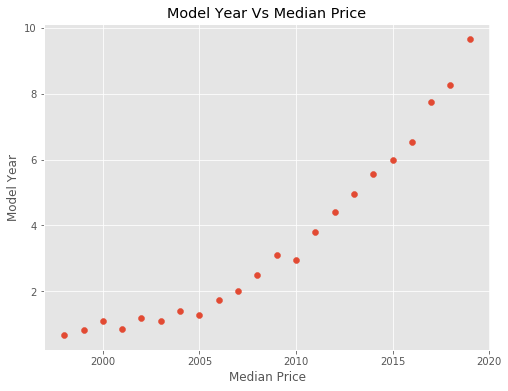

In [402]:
plt.scatter(x=df_new2.groupby(by='Year')['Price'].mean().index,y=df_new2.groupby(by='Year')['Price'].median().values)
plt.title('Model Year Vs Median Price')
plt.xlabel('Median Price')
plt.ylabel('Model Year')
plt.savefig('Model Year Vs Median Price')

In [404]:
def Year(i):
    k=df_new2.Price[(df_new2.Year==i)].describe().tolist()
    iqr=k[6]-k[4]
    up=k[6]+1.5*iqr
    lb=k[4]-1.5*iqr
    l=(df_new2.Price[(df_new2.Year==i)] > up ) | (df_new2.Price[(df_new2.Year==i)] < lb )
    return l.sum()

In [406]:
un_s=df_new2.Year.unique()
outlier=[Year(j) for j in un_s]
out_df2=pd.DataFrame()
out_df2['Year']=np.array(un_s)
out_df2['Count of Outliers']=np.array(outlier)
desc_yr=df_new2.groupby(by='Year',as_index=True)['Price'].describe()
desc_yr=pd.DataFrame(desc_yr,index=None)
desc_yr['Year']=np.array(desc_yr.index)
yr_merge=out_df2.merge(desc_yr,on='Year')
yr_merge.sort_values(by='Count of Outliers',ascending=False)

,Year,Count of Outliers,count,mean,std,min,25%,50%,75%,max
6,2014,139,740.0,8.990149,8.590458,1.00,4.1175,5.550,8.4400,64.75
3,2013,103,621.0,8.439388,9.049907,1.20,3.6500,4.950,8.2500,75.00
2,2012,93,565.0,7.150903,7.509470,0.53,3.1600,4.400,7.0000,70.00
4,2016,89,588.0,11.143027,11.729311,1.80,4.6000,6.520,10.9625,79.00
5,2015,86,659.0,10.938968,11.994712,1.50,4.5000,5.990,11.9700,100.00
0,2010,51,335.0,5.235254,5.784773,0.50,2.2500,2.960,5.4000,42.91
1,2011,48,456.0,6.685702,8.769102,0.44,2.7500,3.800,7.2000,120.00
10,2018,31,169.0,14.535858,14.942990,2.90,6.0300,8.250,13.0000,93.67
7,2017,31,388.0,13.695464,15.236043,1.60,5.0000,7.750,17.1725,160.00
11,2008,21,173.0,3.923064,4.429186,0.60,1.8000,2.500,4.0000,40.88


In [408]:
yr_merge.sort_values(by='Count of Outliers',ascending=False)

,Year,Count of Outliers,count,mean,std,min,25%,50%,75%,max
6,2014,139,740.0,8.990149,8.590458,1.00,4.1175,5.550,8.4400,64.75
3,2013,103,621.0,8.439388,9.049907,1.20,3.6500,4.950,8.2500,75.00
2,2012,93,565.0,7.150903,7.509470,0.53,3.1600,4.400,7.0000,70.00
4,2016,89,588.0,11.143027,11.729311,1.80,4.6000,6.520,10.9625,79.00
5,2015,86,659.0,10.938968,11.994712,1.50,4.5000,5.990,11.9700,100.00
0,2010,51,335.0,5.235254,5.784773,0.50,2.2500,2.960,5.4000,42.91
1,2011,48,456.0,6.685702,8.769102,0.44,2.7500,3.800,7.2000,120.00
10,2018,31,169.0,14.535858,14.942990,2.90,6.0300,8.250,13.0000,93.67
7,2017,31,388.0,13.695464,15.236043,1.60,5.0000,7.750,17.1725,160.00
11,2008,21,173.0,3.923064,4.429186,0.60,1.8000,2.500,4.0000,40.88


In [418]:
out_df2.info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 2 columns):
Year                 22 non-null int64
Count of Outliers    22 non-null int64
dtypes: int64(2)
memory usage: 432.0 bytes


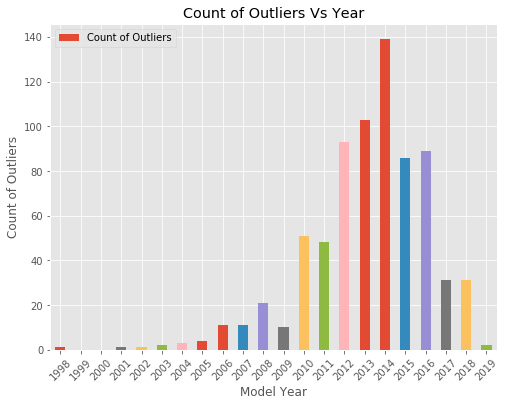

In [424]:
out_df2.sort_values(by='Year').plot(x='Year',y='Count of Outliers',kind='bar',rot=45)
plt.xlabel('Model Year')
plt.ylabel('Count of Outliers')
plt.title('Count of Outliers Vs Year')
plt.savefig('Count of Outliers Vs Year')
plt.show()

In [425]:
df_new2.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price', 'Brand', 'Model', 'Variant', 'New_Price1'],
      dtype='object')

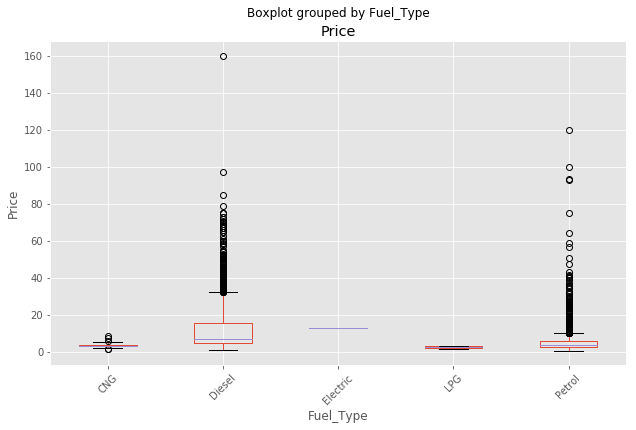

In [426]:
df_new2.boxplot(column='Price',by='Fuel_Type',fontsize=10,figsize=(10,6),rot=45)
plt.ylabel('Price')
plt.savefig('Boxplot on Price grouped by fuel type')

In [576]:
def fuel(i):
    k=df_new2.Price[(df_new2.Fuel_Type==i)].describe().tolist()
    iqr=k[6]-k[4]
    up=k[6]+1.5*iqr
    lb=k[4]-1.5*iqr
    l=(df_new2.Price[(df_new2.Fuel_Type==i)] > up ) | (df_new2.Price[(df_new2.Fuel_Type==i)] < lb )
    return l.sum()
un_s=df_new2.Fuel_Type.unique()
outlier=[fuel(j) for j in un_s]
out_df3=pd.DataFrame()
out_df3['Fuel_Type']=np.array(un_s)
out_df3['Count_of_Outliers']=np.array(outlier)
desc_f=df_new2.groupby(by='Fuel_Type',as_index=True)['Price'].describe()
desc_f=pd.DataFrame(desc_f,index=None)
desc_f['Fuel_Type']=np.array(desc_f.index)
f_merge=out_df3.merge(desc_f,on='Fuel_Type')
f_merge.sort_values(by='Count_of_Outliers',ascending=False).drop('std',axis=1)

,Fuel_Type,Count_of_Outliers,count,mean,min,25%,50%,75%,max
1,Petrol,199,2450.0,5.201249,0.44,2.6000,3.750,5.5000,120.00
2,Diesel,187,2753.0,11.818950,0.60,4.5000,6.920,15.5000,160.00
0,CNG,5,48.0,3.270417,1.20,2.7625,3.125,3.6500,8.25
3,LPG,0,10.0,2.487000,1.45,2.0300,2.600,3.0375,3.20
4,Electric,0,1.0,12.750000,12.75,12.7500,12.750,12.7500,12.75


In [584]:
f_merge['OutliersbyCount']=np.array(f_merge['count']/f_merge.Count_of_Outliers)
f_merge.OutliersbyCount=f_merge.OutliersbyCount.where(f_merge.OutliersbyCount!=np.inf,0).round(2)
f_merge.sort_values(by='OutliersbyCount',ascending=False)

,Fuel_Type,Count_of_Outliers,count,mean,std,min,25%,50%,75%,max,OutliersbyCount
2,Diesel,187,2753.0,11.818950,12.029205,0.60,4.5000,6.920,15.5000,160.00,14.72
1,Petrol,199,2450.0,5.201249,6.629722,0.44,2.6000,3.750,5.5000,120.00,12.31
0,CNG,5,48.0,3.270417,1.287328,1.20,2.7625,3.125,3.6500,8.25,9.60
3,LPG,0,10.0,2.487000,0.648606,1.45,2.0300,2.600,3.0375,3.20,0.00
4,Electric,0,1.0,12.750000,NaN,12.75,12.7500,12.750,12.7500,12.75,0.00


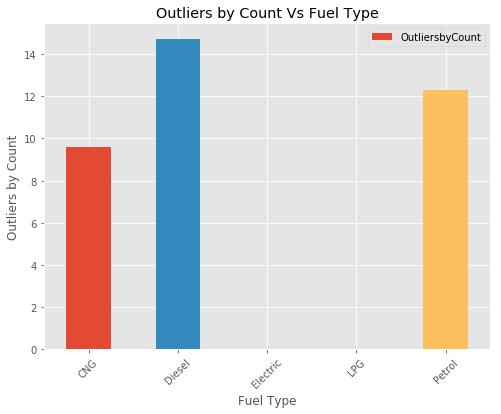

In [585]:
f_merge.sort_values(by='Fuel_Type').plot(x='Fuel_Type',y='OutliersbyCount',kind='bar',rot=45)
plt.xlabel('Fuel Type')
plt.ylabel('Outliers by Count')
plt.title('Outliers by Count Vs Fuel Type')
plt.savefig('Outliers by Count Vs Fuel Type')
plt.show()

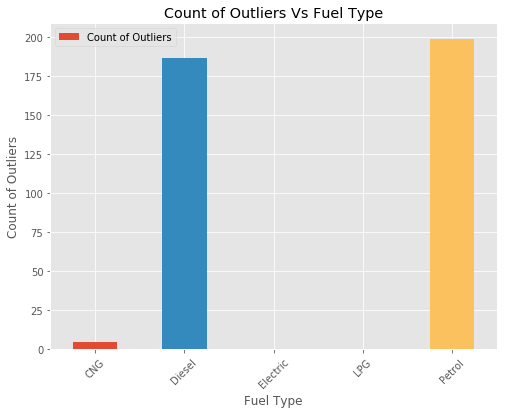

In [431]:
out_df3.sort_values(by='Fuel_Type').plot(x='Fuel_Type',y='Count of Outliers',kind='bar',rot=45)
plt.xlabel('Fuel Type')
plt.ylabel('Count of Outliers')
plt.title('Count of Outliers Vs Fuel Type')
plt.savefig('Count of Outliers Vs Fuel Type')
plt.show()

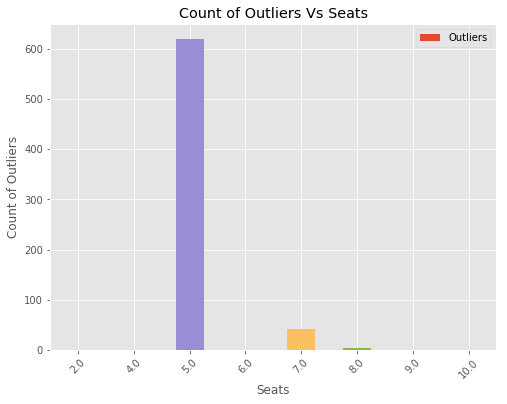

In [437]:
out_df.sort_values(by='Seats').plot(x='Seats',y='Outliers',kind='bar',rot=45)
plt.xlabel('Seats')
plt.ylabel('Count of Outliers')
plt.title('Count of Outliers Vs Seats')
plt.savefig('Count of Outliers Vs Seats')
plt.show()

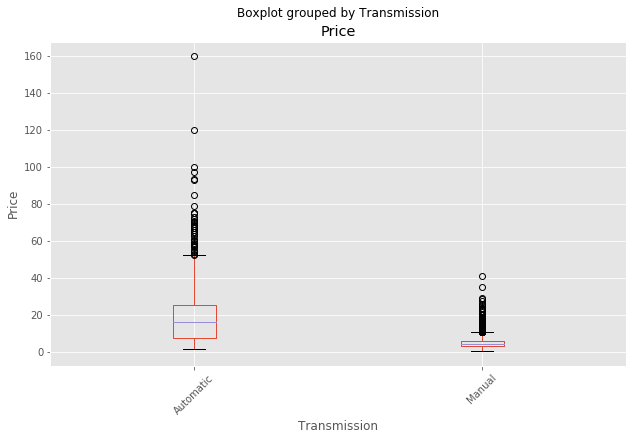

In [438]:
df_new2.boxplot(column='Price',by='Transmission',fontsize=10,figsize=(10,6),rot=45)
plt.ylabel('Price')
plt.savefig('Boxplot on Price grouped by Transmission')

In [587]:
def Trans(i):
    k=df_new2.Price[(df_new2.Transmission==i)].describe().tolist()
    iqr=k[6]-k[4]
    up=k[6]+1.5*iqr
    lb=k[4]-1.5*iqr
    l=(df_new2.Price[(df_new2.Transmission==i)] > up ) | (df_new2.Price[(df_new2.Transmission==i)] < lb )
    return l.sum()
un_s=df_new2.Transmission.unique()
outlier=[Trans(j) for j in un_s]
out_df4=pd.DataFrame()
out_df4['Transmission']=np.array(un_s)
out_df4['Count_of_Outliers']=np.array(outlier)
desc_t=df_new2.groupby(by='Transmission',as_index=True)['Price'].describe()
desc_t=pd.DataFrame(desc_t,index=None)
desc_t['Transmission']=np.array(desc_t.index)
t_merge=out_df4.merge(desc_t,on='Transmission')
t_merge.sort_values(by='Count_of_Outliers',ascending=False).drop('std',axis=1)

,Transmission,Count_of_Outliers,count,mean,min,25%,50%,75%,max
0,Manual,201,3842.0,4.892751,0.44,2.85,4.25,6.0,40.88
1,Automatic,41,1420.0,18.786817,1.50,7.50,16.00,25.5,160.00


In [589]:
t_merge['OutliersbyCount']=np.array(t_merge['count']/t_merge.Count_of_Outliers)
t_merge.OutliersbyCount=t_merge.OutliersbyCount.where(t_merge.OutliersbyCount!=np.inf,0).round(2)
t_merge.sort_values(by='OutliersbyCount',ascending=False)
t_merge.sort_values(by='Transmission').plot(x='Transmission',y='OutliersbyCount',kind='bar',rot=45)

,Transmission,Count_of_Outliers,count,mean,std,min,25%,50%,75%,max,OutliersbyCount
1,Automatic,41,1420.0,18.786817,15.118209,1.50,7.50,16.00,25.5,160.00,34.63
0,Manual,201,3842.0,4.892751,3.228601,0.44,2.85,4.25,6.0,40.88,19.11


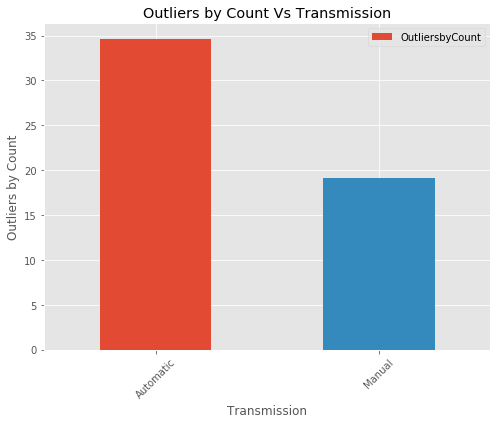

In [590]:
t_merge.sort_values(by='Transmission').plot(x='Transmission',y='OutliersbyCount',kind='bar',rot=45)
plt.xlabel('Transmission')
plt.ylabel('Outliers by Count')
plt.title('Outliers by Count Vs Transmission')
plt.savefig('Outliers by Count Vs Transmission')
plt.show()

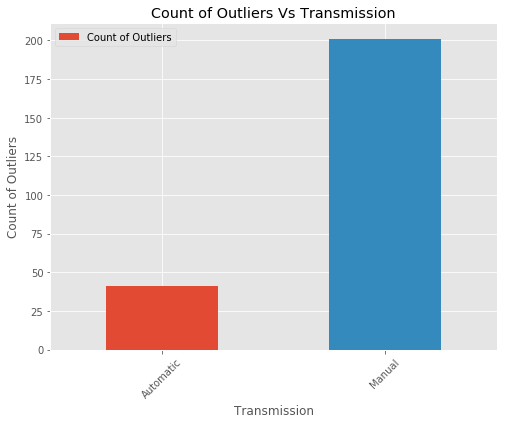

In [440]:
out_df4.sort_values(by='Transmission').plot(x='Transmission',y='Count of Outliers',kind='bar',rot=45)
plt.xlabel('Transmission')
plt.ylabel('Count of Outliers')
plt.title('Count of Outliers Vs Transmission')
plt.savefig('Count of Outliers Vs Transmission')
plt.show()

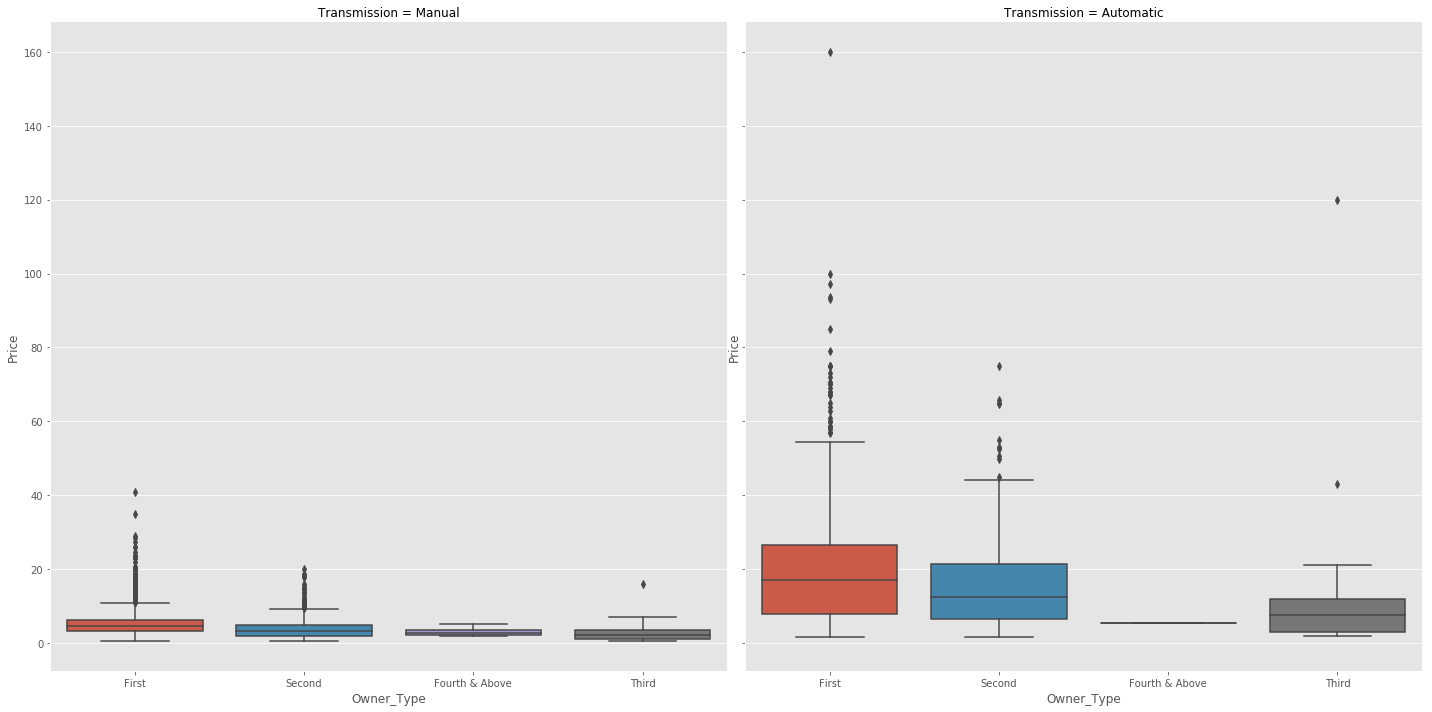

In [444]:
mx = sns.factorplot(x="Owner_Type", y="Price", data=df_new2, kind="box",col='Transmission', size=10 ,aspect=1)
mx.set(xlabel='Owner_Type')
mx.set(ylabel= 'Price')
plt.savefig('Owner_Type vs Price--segg by Transmission')

In [592]:
def owner_type(i):
    k=df_new2.Price[(df_new2.Owner_Type==i)].describe().tolist()
    iqr=k[6]-k[4]
    up=k[6]+1.5*iqr
    lb=k[4]-1.5*iqr
    l=(df_new2.Price[(df_new2.Owner_Type==i)] > up ) | (df_new2.Price[(df_new2.Owner_Type==i)] < lb )
    return l.sum()
un_s=df_new2.Owner_Type.unique()
outlier=[owner_type(j) for j in un_s]
out_df5=pd.DataFrame()
out_df5['Owner_Type']=np.array(un_s)
out_df5['Count_of_Outliers']=np.array(outlier)
desc_o=df_new2.groupby(by='Owner_Type',as_index=True)['Price'].describe()
desc_o=pd.DataFrame(desc_o,index=None)
desc_o['Owner_Type']=np.array(desc_o.index)
o_merge=out_df5.merge(desc_o,on='Owner_Type')
o_merge.sort_values(by='Count_of_Outliers',ascending=False).drop('std',axis=1)

,Owner_Type,Count_of_Outliers,count,mean,min,25%,50%,75%,max
0,First,589,4206.0,9.039527,0.50,3.500,5.40,9.0000,160.0
1,Second,111,935.0,7.337957,0.44,2.400,4.18,7.9600,75.0
3,Third,12,112.0,5.039911,0.45,1.295,2.75,4.2375,120.0
2,Fourth & Above,0,9.0,3.280000,1.97,2.200,3.00,4.0000,5.5


In [593]:
o_merge['OutliersbyCount']=np.array(o_merge['count']/o_merge.Count_of_Outliers)
o_merge.OutliersbyCount=o_merge.OutliersbyCount.where(o_merge.OutliersbyCount!=np.inf,0).round(2)
o_merge.sort_values(by='OutliersbyCount',ascending=False)

,Owner_Type,Count_of_Outliers,count,mean,std,min,25%,50%,75%,max,OutliersbyCount
3,Third,12,112.0,5.039911,12.105081,0.45,1.295,2.75,4.2375,120.0,9.33
1,Second,111,935.0,7.337957,9.052561,0.44,2.400,4.18,7.9600,75.0,8.42
0,First,589,4206.0,9.039527,10.546632,0.50,3.500,5.40,9.0000,160.0,7.14
2,Fourth & Above,0,9.0,3.280000,1.316378,1.97,2.200,3.00,4.0000,5.5,0.00


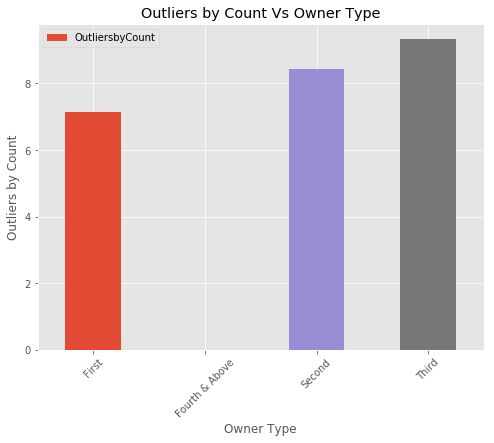

In [594]:
o_merge.sort_values(by='Owner_Type').plot(x='Owner_Type',y='OutliersbyCount',kind='bar',rot=45)
plt.xlabel('Owner Type')
plt.ylabel('Outliers by Count')
plt.title('Outliers by Count Vs Owner Type')
plt.savefig('Outliers by Count Vs Owner Type')
plt.show()

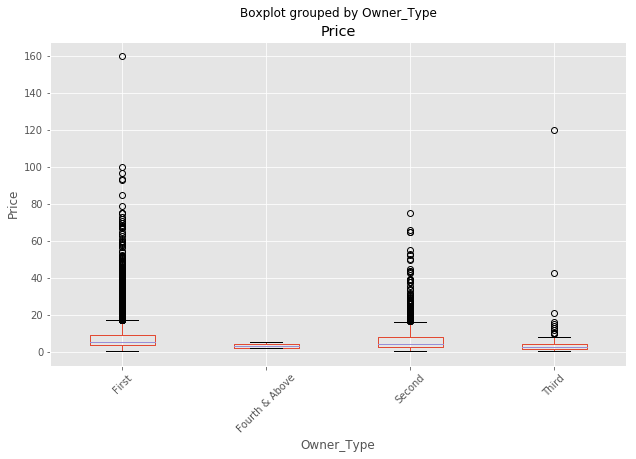

In [446]:
df_new2.boxplot(column='Price',by='Owner_Type',fontsize=10,figsize=(10,6),rot=45)
plt.ylabel('Price')
plt.savefig('Boxplot on Price grouped by Owner_type')

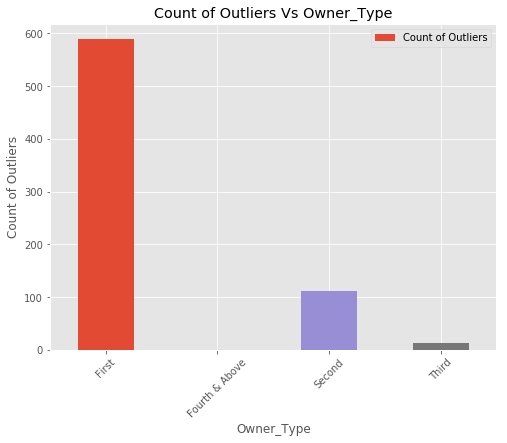

In [449]:
out_df5.sort_values(by='Owner_Type').plot(x='Owner_Type',y='Count of Outliers',kind='bar',rot=45)
plt.xlabel('Owner_Type')
plt.ylabel('Count of Outliers')
plt.title('Count of Outliers Vs Owner_Type')
plt.savefig('Count of Outliers Vs Owner_Type')
plt.show()

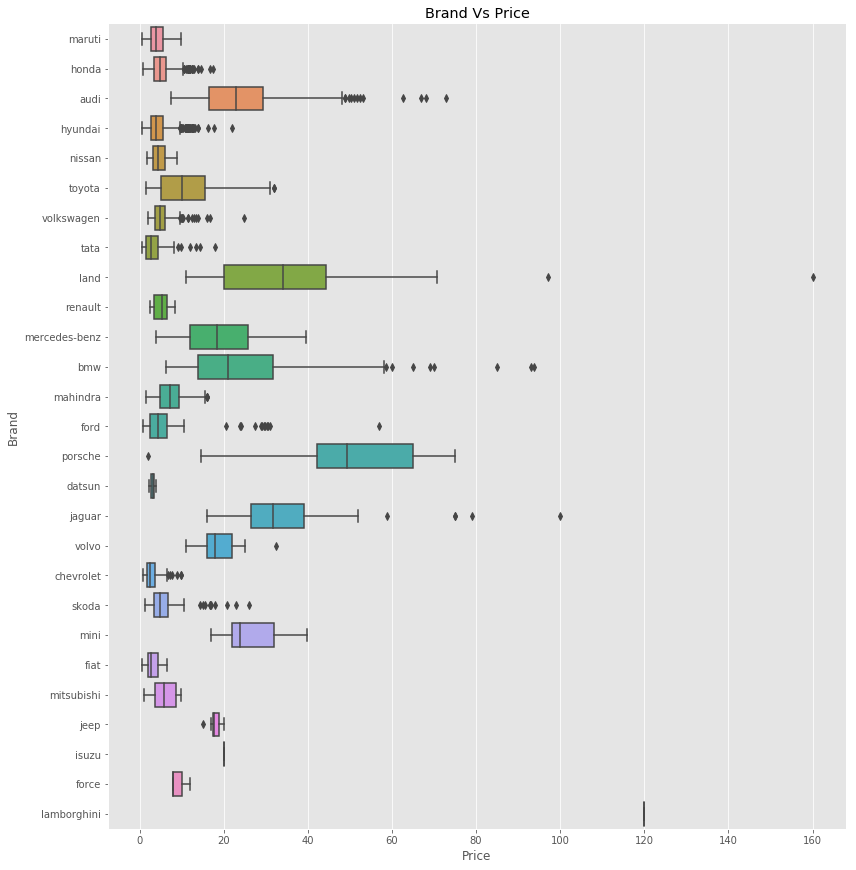

In [611]:
mx = sns.factorplot(y="Brand", x="Price", data=df_new2,kind="box",size=12 ,aspect=1)
mx.set(ylabel='Brand')
mx.set(xlabel= 'Price')
plt.title('Brand Vs Price');
plt.savefig('Brand Vs Price')

In [458]:
manual=df_new2[df_new2.Transmission=='Manual']
auto=df_new2[df_new2.Transmission=='Automatic']

In [482]:
manual.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price', 'Brand', 'Model', 'Variant', 'New_Price1'],
      dtype='object')

In [468]:
manual.groupby(by='Location')['Location'].count().index.tolist()

['Ahmedabad',
 'Bangalore',
 'Chennai',
 'Coimbatore',
 'Delhi',
 'Hyderabad',
 'Jaipur',
 'Kochi',
 'Kolkata',
 'Mumbai',
 'Pune']

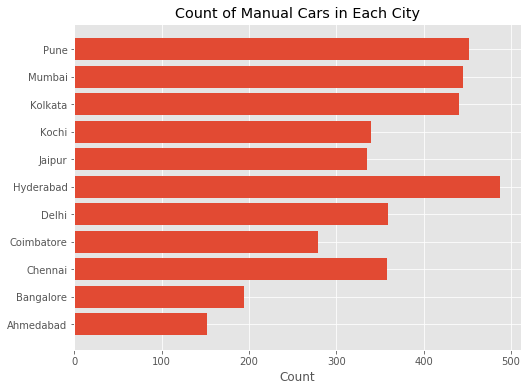

In [483]:
plt.barh(manual.groupby(by='Location')['Location'].count().index.tolist(),manual.groupby(by='Location')['Location'].count().values.tolist())
# manual.sort_values(by='Location').plot(x='Location',y='Count of Outliers',kind='bar',rot=45)
plt.title('Count of Manual Cars in Each City')
plt.xlabel('Count')
plt.savefig('Count of manual cars in each city')
plt.show()

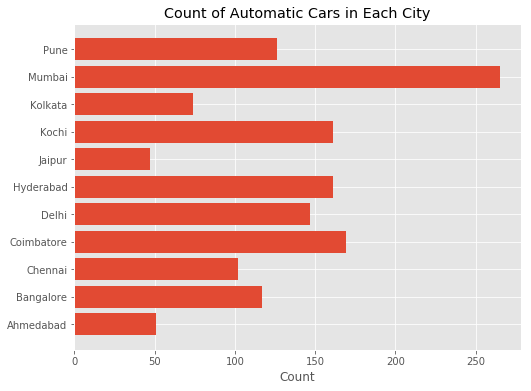

In [484]:
plt.barh(auto.groupby(by='Location')['Location'].count().index.tolist(),auto.groupby(by='Location')['Location'].count().values.tolist())
plt.title('Count of Automatic Cars in Each City')
plt.xlabel('Count')
plt.savefig('Count ofautomatic cars in each city')
plt.show()

In [485]:
df_new2.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price', 'Brand', 'Model', 'Variant', 'New_Price1'],
      dtype='object')

In [595]:
def brand(i):
    k=df_new2.Price[(df_new2.Brand==i)].describe().tolist()
    iqr=k[6]-k[4]
    up=k[6]+1.5*iqr
    lb=k[4]-1.5*iqr
    l=(df_new2.Price[(df_new2.Brand==i)] > up ) | (df_new2.Price[(df_new2.Brand==i)] < lb )
    return l.sum()
un_s=df_new2.Brand.unique()
outlier=[brand(j) for j in un_s]
out_df6=pd.DataFrame()
out_df6['Brand']=np.array(un_s)
out_df6['Count_of_Outliers']=np.array(outlier)
desc_b=df_new2.groupby(by='Brand',as_index=True)['Price'].describe()
desc_b=pd.DataFrame(desc_b,index=None)
desc_b['Brand']=np.array(desc_b.index)
b_merge=out_df6.merge(desc_b,on='Brand')
b_merge.sort_values(by='Count_of_Outliers',ascending=False).drop('std',axis=1)

,Brand,Count_of_Outliers,count,mean,min,25%,50%,75%,max
3,hyundai,42,887.0,4.441917,0.45,2.7500,3.960,5.5000,21.99
1,honda,24,550.0,5.139818,0.90,3.5000,4.750,6.2500,17.50
6,volkswagen,14,310.0,5.259484,2.10,3.7500,4.800,6.0750,24.90
13,ford,12,260.0,5.705231,0.69,2.5500,4.475,6.5625,56.80
2,audi,12,223.0,24.921480,7.50,16.5950,22.950,29.2500,72.94
19,skoda,10,125.0,5.980160,1.25,3.5000,4.750,6.7500,26.00
11,bmw,8,266.0,25.107782,6.30,13.9125,21.000,31.6875,93.67
7,tata,6,176.0,3.298580,0.44,1.6000,2.800,4.2875,17.85
18,chevrolet,6,121.0,3.044463,0.75,1.7500,2.500,3.7000,9.87
16,jaguar,5,39.0,37.251026,16.00,26.5100,31.800,39.0000,100.00


In [597]:
b_merge.head()

,Brand,Count_of_Outliers,count,mean,std,min,25%,50%,75%,max,OutliersbyCount
0,maruti,0,1090.0,4.175385,2.053528,0.45,2.650,3.85,5.60,9.90,7.14
1,honda,24,550.0,5.139818,2.441174,0.90,3.500,4.75,6.25,17.50,8.42
2,audi,12,223.0,24.921480,12.151261,7.50,16.595,22.95,29.25,72.94,0.00
3,hyundai,42,887.0,4.441917,2.508512,0.45,2.750,3.96,5.50,21.99,9.33
4,nissan,0,89.0,4.670787,1.718682,1.75,3.250,4.26,6.00,8.92,NaN


In [599]:
b_merge['OutliersbyCount']=np.array(b_merge['count']/b_merge.Count_of_Outliers)
b_merge.OutliersbyCount=b_merge.OutliersbyCount.where(b_merge.OutliersbyCount!=np.inf,0).round(2)
b_merge.sort_values(by='OutliersbyCount',ascending=False)

,Brand,Count_of_Outliers,count,mean,std,min,25%,50%,75%,max,OutliersbyCount
5,toyota,2,377.0,10.850663,6.565311,1.50,5.1000,10.050,15.5000,32.00,188.50
12,mahindra,3,217.0,7.360323,3.280381,1.50,4.8500,7.200,9.2500,16.13,72.33
11,bmw,8,266.0,25.107782,15.031032,6.30,13.9125,21.000,31.6875,93.67,33.25
7,tata,6,176.0,3.298580,2.480361,0.44,1.6000,2.800,4.2875,17.85,29.33
8,land,2,55.0,37.731455,24.662058,11.00,20.0250,34.080,44.2500,160.00,27.50
1,honda,24,550.0,5.139818,2.441174,0.90,3.5000,4.750,6.2500,17.50,22.92
6,volkswagen,14,310.0,5.259484,2.432121,2.10,3.7500,4.800,6.0750,24.90,22.14
13,ford,12,260.0,5.705231,6.117411,0.69,2.5500,4.475,6.5625,56.80,21.67
3,hyundai,42,887.0,4.441917,2.508512,0.45,2.7500,3.960,5.5000,21.99,21.12
18,chevrolet,6,121.0,3.044463,1.827563,0.75,1.7500,2.500,3.7000,9.87,20.17


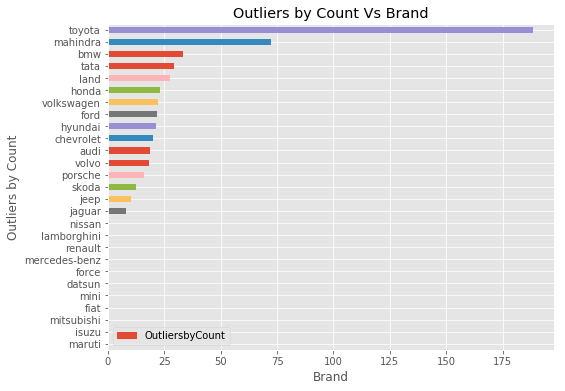

In [607]:
b_merge.sort_values(by='OutliersbyCount').plot(x='Brand',y='OutliersbyCount',kind='barh')
plt.xlabel('Owner Type')
plt.xlabel('Brand')
plt.ylabel('Outliers by Count')
plt.title('Outliers by Count Vs Brand')
plt.savefig('OutliersbyCount Vs Brand')
plt.show()

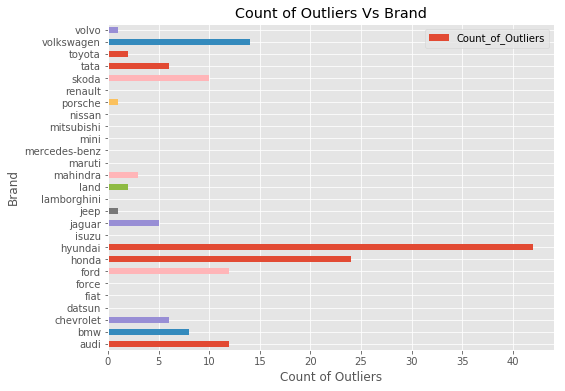

In [615]:
out_df6.sort_values(by='Brand').plot(x='Brand',y='Count_of_Outliers',kind='barh')
plt.ylabel('Brand')
plt.xlabel('Count of Outliers')
plt.title('Count of Outliers Vs Brand')
plt.savefig('Count of Outliers Vs Brand')
plt.show()

AttributeError: module 'seaborn' has no attribute 'scatterplot'

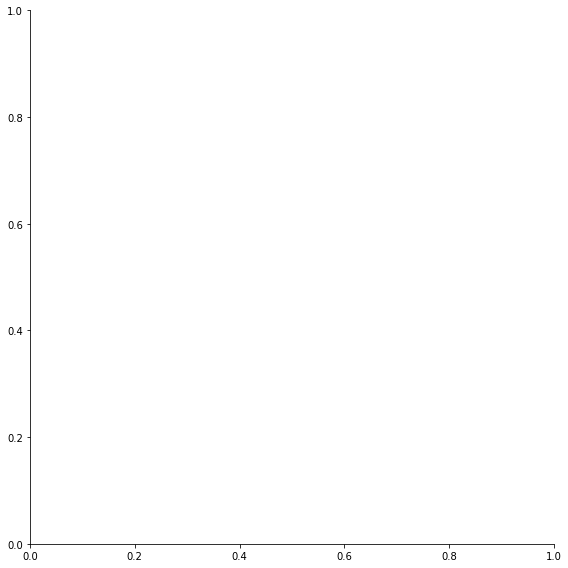

In [97]:
sns.FacetGrid(df_new2,hue='Transmission',size=8)\
    .map(sns.scatterplot,"Price","Power")\
    .add_legend()
plt.title('Power Vs Price')
# plt.savefig('Power Vs Price')
# ax=sns.regplot(x=df_new2.Power, y=df_new2.Price,
#                       hue=df_new2.Transmission, style=df_new2.Transmission)

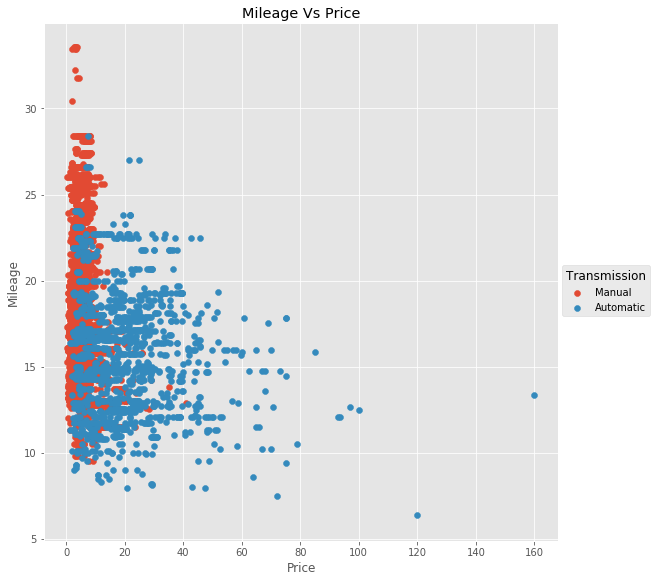

In [513]:
sns.FacetGrid(df_new2,hue='Transmission',size=8)\
    .map(plt.scatter,"Price","Mileage")\
    .add_legend()
plt.title('Mileage Vs Price')
plt.savefig('Mileage Vs Price')

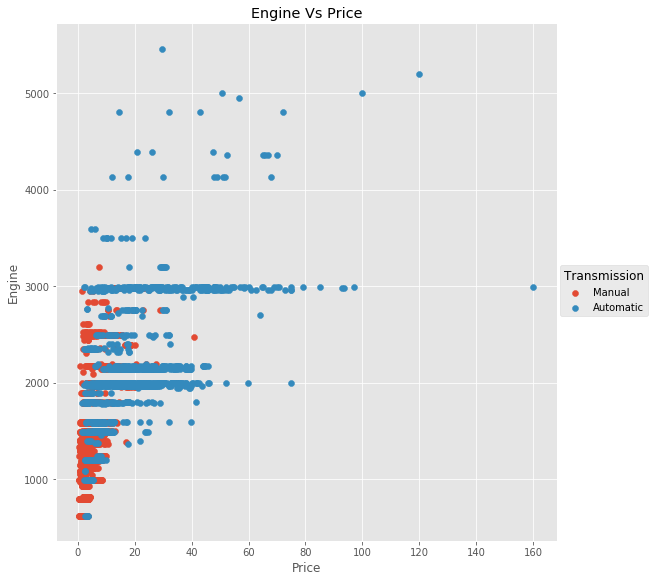

In [514]:
sns.FacetGrid(df_new2,hue='Transmission',size=8)\
    .map(plt.scatter,"Price","Engine")\
    .add_legend()
plt.title('Engine Vs Price')
plt.savefig('Engine Vs Price')

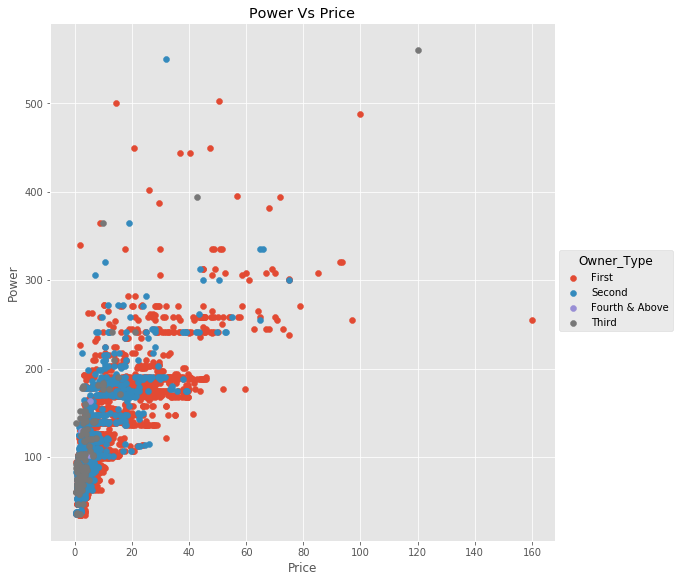

In [515]:
sns.FacetGrid(df_new2,hue='Owner_Type',size=8)\
    .map(plt.scatter,"Price","Power")\
    .add_legend()
plt.title('Power Vs Price')
plt.savefig('Power Vs Price on owner_type')

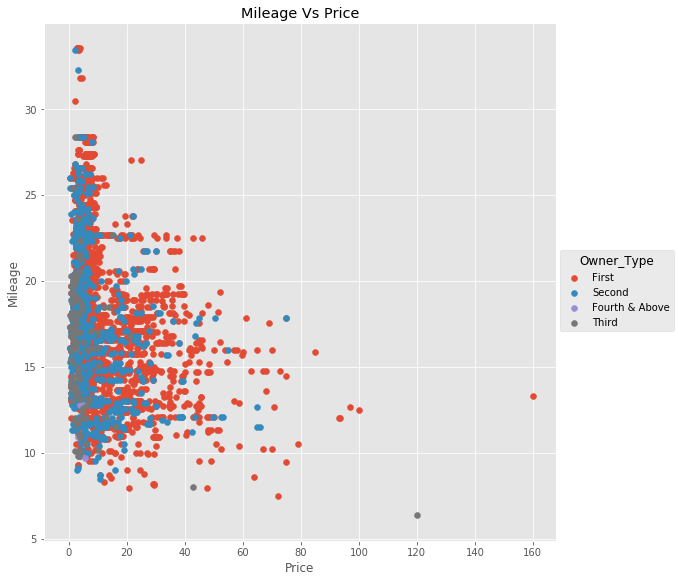

In [516]:
sns.FacetGrid(df_new2,hue='Owner_Type',size=8)\
    .map(plt.scatter,"Price","Mileage")\
    .add_legend()
plt.title('Mileage Vs Price')
plt.savefig('Mileage Vs Price on owner_type')

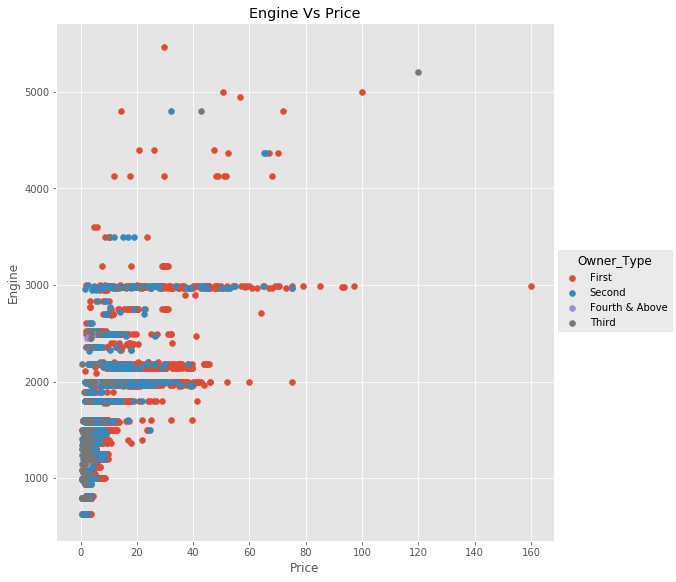

In [517]:
sns.FacetGrid(df_new2,hue='Owner_Type',size=8)\
    .map(plt.scatter,"Price","Engine")\
    .add_legend()
plt.title('Engine Vs Price')
plt.savefig('Engine Vs Price on owner_type')

In [1]:
df_new2

NameError: name 'df_new2' is not defined

In [518]:
df_new2['namelen']=[len(n) for n in df_new2['Name']]
df_new2['log_eng']=np.log(df_new2['Engine'])
df_new2['log_power']=np.log(df_new2['Power'])

In [630]:
df_new2.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price', 'Brand', 'Model', 'Variant', 'New_Price1', 'namelen',
       'log_eng', 'log_power', 'Ratio'],
      dtype='object')

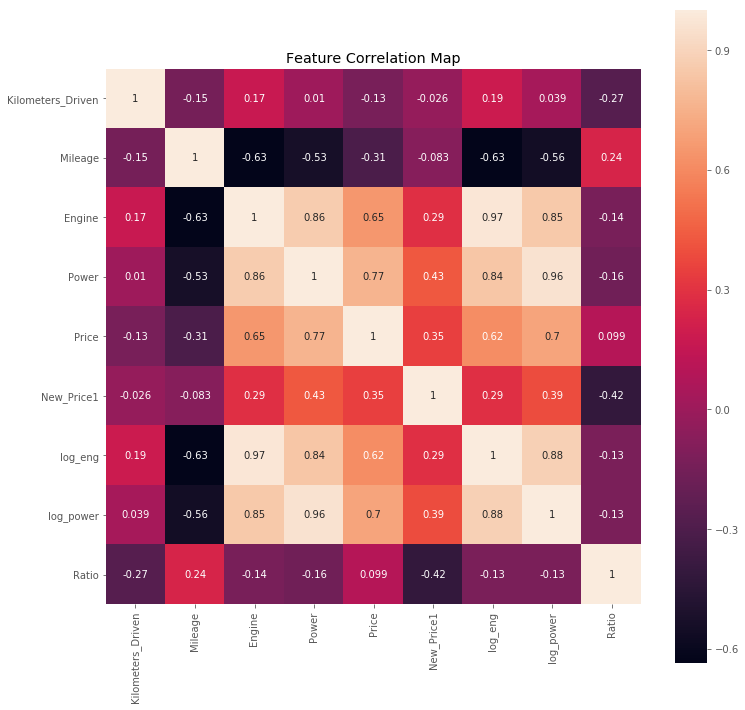

In [640]:
plt.figure(figsize=(12,12))
plt.title('Feature Correlation Map')
sns.heatmap(df_new2.drop(['Name', 'Location', 'Year', 'Fuel_Type',
       'Transmission', 'Seats','Owner_Type','Brand', 'Model', 'Variant','namelen'],axis=1).corr(),linewidths=.1,vmax=1.0,
            square=True,linecolor='',annot=True)
plt.yticks(rotation=0)
plt.savefig('Correlation map')

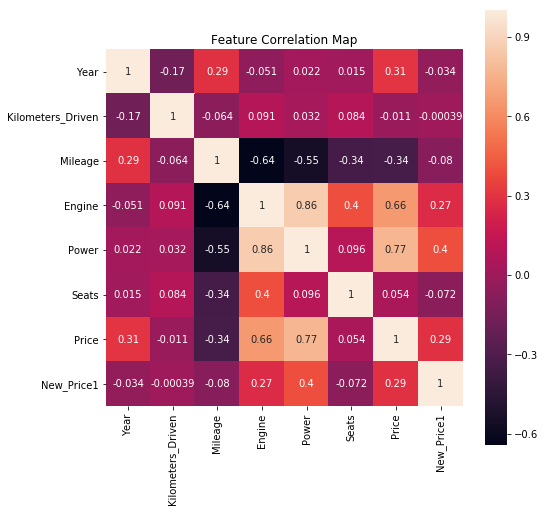

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,8))
plt.title('Feature Correlation Map')
sns.heatmap(df_new.corr(),linewidths=.1,vmax=1.0,
            square=True,linecolor='',annot=True)
plt.savefig('Feature Correlation Map')

In [257]:
data_loc=pd.DataFrame(df.groupby(['Location'])[['Kilometers_Driven']].mean())
data_loc

,Kilometers_Driven
Location,
Ahmedabad,55295.779817
Bangalore,58228.871720
Chennai,90496.326316
Coimbatore,47025.744409
Delhi,57143.836096
Hyderabad,70674.842917
Jaipur,70447.837905
Kochi,44793.569207
Kolkata,43503.755299


In [258]:
import numpy as np
loc=np.array(df['Location'].unique())
loc

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

In [259]:
loc.sort(axis=0)
# loc=loc.reshape(1,11)
# loc

In [260]:
data_loc['Location']=np.array(loc)

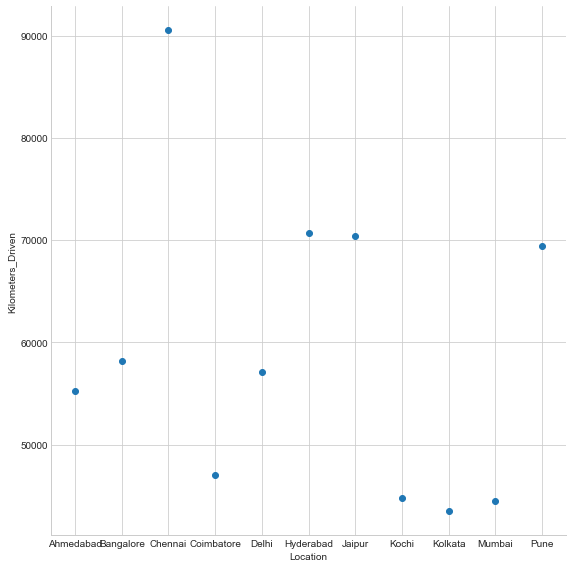

In [262]:
sns.FacetGrid(data_loc,size=8)\
    .map(plt.scatter,"Location","Kilometers_Driven")\
    .add_legend();
plt.show()

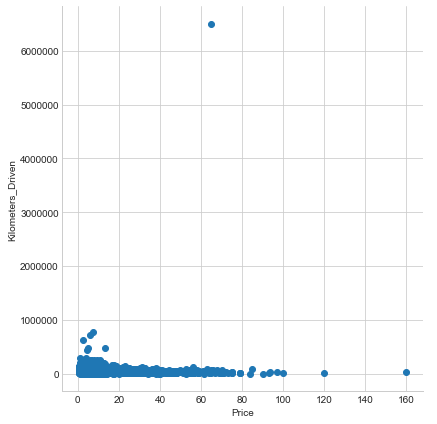

In [274]:
sns.FacetGrid(df,size=6)\
    .map(plt.scatter,"Price","Kilometers_Driven")\
    .add_legend()

In [275]:
np.corrcoef(df['Power'],df['Kilometers_Driven'])

array([[1.        , 0.03437923],
       [0.03437923, 1.        ]])

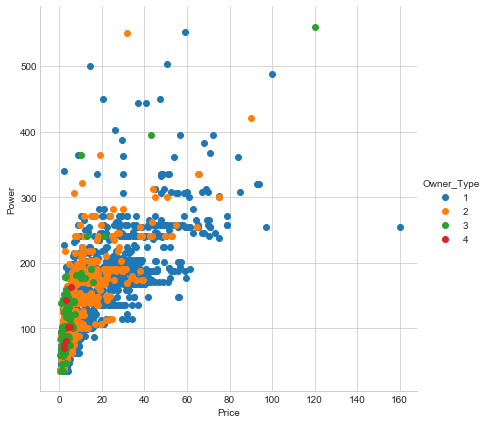

In [277]:
sns.FacetGrid(df,hue='Owner_Type',size=6)\
    .map(plt.scatter,"Price","Power")\
    .add_legend()

In [264]:
np.corrcoef(df['Power'],df['Price'])

array([[1.        , 0.77494608],
       [0.77494608, 1.        ]])

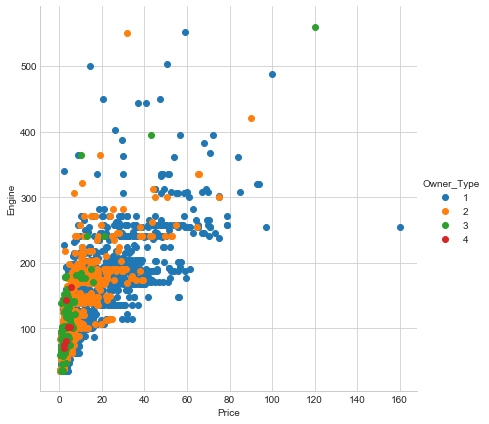

In [276]:
sns.FacetGrid(df,hue='Owner_Type',size=6)\
    .map(plt.scatter,"Price","Engine")\
    .add_legend()

In [266]:
np.corrcoef(df['Engine'],df['Price'])

array([[1.        , 0.77494608],
       [0.77494608, 1.        ]])

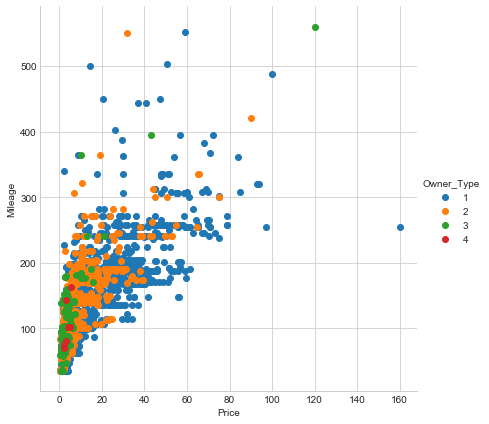

In [278]:
sns.FacetGrid(df,hue='Owner_Type',size=6)\
    .map(plt.scatter,"Price","Mileage")\
    .add_legend()

In [268]:
np.corrcoef(df['Mileage'],df['Price'])

array([[1.        , 0.77494608],
       [0.77494608, 1.        ]])

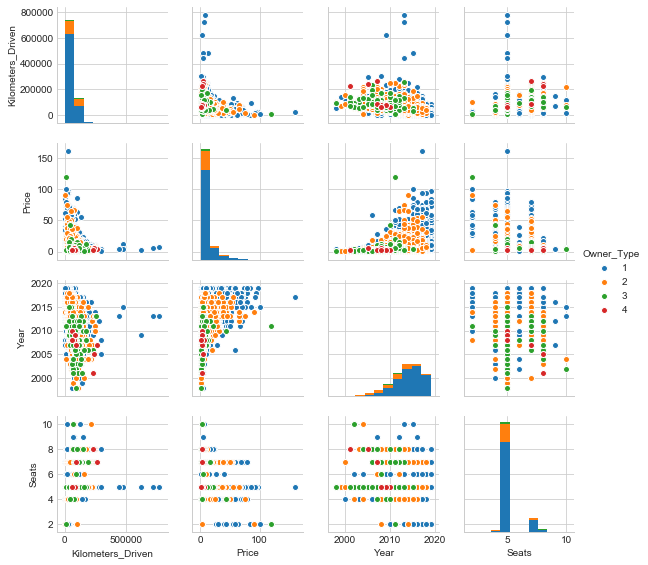

In [56]:
plt.close()
sns.set_style("whitegrid");
sns.pairplot(df,hue='Owner_Type',vars=["Kilometers_Driven","Price","Year","Seats"],size=2);
plt.show()